# Assignment 5
## Due May 28 at 14:00

Please note: 

- Read the instructions in the exercise PDF and in this notebook carefully.
- Add your solutions *only* at `YOUR CODE HERE`/`YOUR ANSWER HERE` and remove the corresponding `raise NotImplementedError()`.
- Do not chance the provided code and text, if not stated.
- Do not *add* or *delete* cells.
- Do not `import` additional functionality. 
- Before submitting: Please make sure, that your notebook can be executed from top to bottom `Menu -> Kernel -> Restart & Run all`. 

In [1]:
import time 

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.testing import assert_equal, assert_almost_equal

from sklearn.datasets import load_breast_cancer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

#  Hide warnings of LinearSVC, LogisticRegression
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

np.random.seed(42)

## a) Know the Dataset


In [2]:
data = load_breast_cancer()
print(f"Features are {data.feature_names}")
print(f"\nlabesl are {data.target_names}")

Features are ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

labesl are ['malignant' 'benign']


- **Features:** 
    YOUR ANSWER HERE
- **Labels:** 
    YOUR ANSWER HERE

## b) Try a Linear SVM

In [3]:
dataset = load_breast_cancer()

xs = dataset.data
ys = dataset.target

Split `xs, ys` to the training set `xs_train, ys_train` (size $70\%$) and the test set `xs_test, ys_test` (size $30\%$) 

In [4]:
# YOUR CODE HERE
n = len(xs) * 7 //10

xs_train = xs[:n]
xs_test = xs[n:]

ys_train = ys[:n]
ys_test = ys[n:]


In [5]:
assert_equal(xs_train.shape, (398, 30))
assert_equal(ys_train.shape, (398,))


Train 50 linear svc estimators with default hyperparameter, but varying the [random_state](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) values. Store these inital state values and the corresponding error on the test set (mean 0-1-loss). 

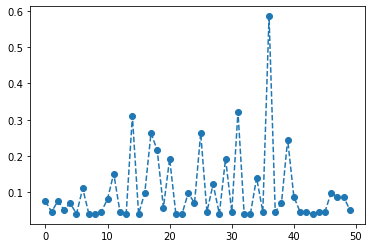

In [17]:
init_states = np.arange(50)
test_errors = np.zeros(50)

for i in init_states:
    clf = LinearSVC(random_state=i)
    clf.fit(xs_train, ys_train)
    test_errors[i] = np.mean(clf.predict(xs_test) != ys_test)
plt.plot(init_states, test_errors,'--o')

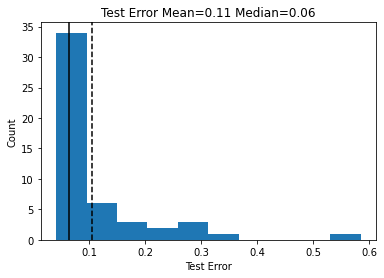

In [7]:
assert len(init_states) == 50
assert len(test_errors) == 50


plt.hist(test_errors)
plt.axvline(np.mean(test_errors), color='k', linestyle='dashed')
plt.axvline(np.median(test_errors), color='k')
plt.xlabel('Test Error')
plt.ylabel('Count')
plt.title(f"Test Error Mean={np.mean(test_errors):.2f} Median={np.median(test_errors):.2f}")
plt.show()

## c) Optimize the Hyperparameter

Find good hyperparameter *without* the test set.

In [10]:
# DO NOT USE xs_test, ys_test here!
# Please make your optimization reproducable (e.g. set random_state, seed, …)

best_params = {}

# YOUR CODE HERE
C = [0.0001, 0.001,0.002,0.003,0.004,0.005, 0.8, 0.09]
state = [i*3 for i in range(len(C))]
errors = []
best_error = np.inf
m = 3* n // 4
xs_strain, ys_strain = xs_train[:m], ys_train[:m]
xs_val, ys_val = xs_train[m:], ys_train[m:]
start_time = time.time()
for i in C:
    for s in state:
        clf = LinearSVC(C=i, random_state=s)
        clf.fit(xs_strain, ys_strain)
        score = np.mean(clf.predict(xs_val) != ys_val)
        if best_error > score:
            best_error = score
            best_params['C'] = i
            best_params['random_state'] = s
end_time = time.time()
best_estimator = LinearSVC(**best_params).fit(xs_train, ys_train)
print(best_estimator.score(xs_test,ys_test))

0.9532163742690059


In [11]:
assert isinstance(best_estimator, LinearSVC)
assert best_params != {}

second_estimator = LinearSVC(**best_params).fit(xs_train, ys_train)
assert_equal(best_estimator.predict(xs_test), second_estimator.predict(xs_test))

In [12]:
test_error = np.mean(best_estimator.predict(xs_test) != ys_test)
assert test_error < 0.09

In [13]:
assert test_error < 0.06

## d) Linear SVM vs Logistic Regression

Train a logistic regression estimator and compare it to the best svm estimator above.

In [15]:
# if you did not solve c), use this:
# svm_estimator = LinearSVC(C=0.002, random_state=42).fit(xs_train, ys_train)
# else, use this:
svm_estimator = best_estimator  

# YOUR CODE HERE
logreg = LogisticRegression()
logreg.fit(xs_train, ys_train)
logreg_error, svm_error  = np.mean(logreg.predict(xs_test) != ys_test), np.mean(svm_estimator.predict(xs_test) != ys_test)
print(logreg_error, svm_error)

0.07602339181286549 0.04678362573099415


Compare the models. Which model would you choose and why?

We will prefer the SVM becuse it performs 3% better than the Logistic Regression

## e) State concerns

1. **Ethical:** 
    YOUR ANSWER HERE
2. **Technical/Statistical:**
    YOUR ANSWER HERE
3. **Any:**
    YOUR ANSWER HERE